# Sobre el Conjunto de Datos

## Contexto
No siempre es fácil encontrar bases de datos provenientes de plantas de manufactura del mundo real, especialmente de plantas mineras. Por lo tanto, me gustaría compartir esta base de datos con la comunidad, la cual proviene de una de las partes más importantes del proceso minero: ¡una planta de flotación!

**¡POR FAVOR AYÚDAME A OBTENER MÁS CONJUNTOS DE DATOS COMO ESTE LLENANDO UNA ENCUESTA DE 30 SEGUNDOS!**

[Link al repo de Kaggle](https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process/data)

El objetivo principal es usar estos datos para predecir la cantidad de impurezas en el concentrado de mineral. Dado que esta impureza se mide cada hora, si podemos predecir la cantidad de sílice (impureza) en el concentrado de mineral, podemos ayudar a los ingenieros proporcionándoles información temprana para que tomen acciones (¡empoderamiento!). De este modo, podrán tomar acciones correctivas con anticipación (reducir la impureza, si es necesario) y también ayudar al medio ambiente (al reducir la cantidad de mineral que va a los relaves al disminuir la sílice en el concentrado).

## Contenido
La primera columna muestra el rango de tiempo y fecha (desde marzo de 2017 hasta septiembre de 2017). Algunas columnas fueron muestreadas cada 20 segundos, mientras que otras fueron muestreadas de forma horaria.

Las segunda y tercera columnas son medidas de calidad de la pulpa de mineral de hierro justo antes de que se alimente a la planta de flotación. Las columnas de la 4 a la 8 son las variables más importantes que impactan la calidad del mineral al final del proceso. De la columna 9 a la 22, podemos ver datos del proceso (nivel y flujo de aire dentro de las columnas de flotación, que también afectan la calidad del mineral). Las dos últimas columnas son las mediciones finales de calidad de la pulpa de mineral de hierro provenientes del laboratorio.

El objetivo es predecir la última columna, que es el porcentaje de sílice en el concentrado de mineral de hierro.

## Inspiración
He trabajado en este conjunto de datos por al menos seis meses y me gustaría ver si la comunidad puede ayudar a responder las siguientes preguntas:

- ¿Es posible predecir el % de sílice en el concentrado cada minuto?
- ¿Cuántas horas por adelantado podemos predecir el % de sílice en el concentrado? Esto ayudaría a los ingenieros a actuar de manera predictiva y optimizada, mitigando la cantidad de hierro que podría haberse ido a los relaves.
- ¿Es posible predecir el % de sílice en el concentrado sin usar la columna de % de hierro en el concentrado (ya que están altamente correlacionadas)?

## Cómo afecta el % de sílice al concentrado de hierro
La presencia de sílice en el concentrado de mineral de hierro es una impureza que afecta negativamente la calidad del producto final. A medida que aumenta el porcentaje de sílice, la calidad del concentrado de hierro disminuye, lo que puede llevar a pérdidas en el proceso de refinamiento y mayores costos para eliminar estas impurezas en etapas posteriores. Además, un mayor contenido de sílice puede resultar en más desperdicio, ya que una mayor cantidad de mineral podría ser enviada a los relaves en lugar de ser aprovechada. Reducir el porcentaje de sílice es crucial tanto para optimizar la eficiencia del proceso como para minimizar el impacto ambiental, al reducir los desechos generados.


# Resumen

Este conjunto de datos se refiere a una planta de flotación, un proceso utilizado para concentrar el mineral de hierro. Este proceso es muy común en una planta minera.

## Objetivo del conjunto de datos
El objetivo es predecir el porcentaje de sílice al final del proceso, que corresponde al concentrado de mineral de hierro y su impureza (que es el porcentaje de sílice).

## ¿Por qué es necesaria la predicción?
Aunque el porcentaje de sílice se mide (en la última columna), es una medición de laboratorio, lo que significa que toma al menos una hora para que los ingenieros de proceso tengan este valor. Por lo tanto, si es posible predecir la cantidad de impureza en el proceso de manera anticipada, se puede tomar acciones correctivas con mayor rapidez.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv', decimal=',')
target = '% Silica Concentrate'
print(df.shape)
df.drop(['date'], inplace=True, axis=1)

df.head()


(737453, 24)


% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  Ore Pulp Flow  \
0         55.2          16.98      3019.53     557.434        395.713   
1         55.2          16.98      3024.41     563.965        397.383   
2         55.2          16.98      3043.46     568.054        399.668   
3         55.2          16.98      3047.36     568.665        397.939   
4         55.2          16.98      3033.69     558.167        400.254   

   Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0      10.0664              1.74                       249.214   
1      10.0672              1.74                       249.719   
2      10.0680              1.74                       249.741   
3      10.0689              1.74                       249.917   
4      10.0697              1.74                       250.203   

   Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  ...  \
0                       253.235                       250.576  ...   
1                       250.532                       250.862  ...   
2                       247.874                       250.313  ...   
3                       254.487                       250.049  ...   
4                       252.136                       249.895  ...   

   Flotation Column 07 Air Flow  Flotation Column 01 Level  \
0                       250.884                    457.396   
1                       248.994                    451.891   
2                       248.071                    451.240   
3                       251.147                    452.441   
4                       248.928                    452.441   

   Flotation Column 02 Level  Flotation Column 03 Level  \
0                    432.962                    424.954   
1                    429.560                    432.939   
2                    468.927                    434.610   
3                    458.165                    442.865   
4                    452.900                    450.523   

   Flotation Column 04 Level  Flotation Column 05 Level  \
0                    443.558                    502.255   
1                    448.086                    496.363   
2                    449.688                    484.411   
3                    446.210                    471.411   
4                    453.670                    462.598   

   Flotation Column 06 Level  Flotation Column 07 Level  % Iron Concentrate  \
0                    446.370                    523.344               66.91   
1                    445.922                    498.075               66.91   
2                    447.826                    458.567               66.91   
3                    437.690                    427.669               66.91   
4                    443.682                    425.679               66.91   

   % Silica Concentrate  
0                  1.31  
1                  1.31  
2                  1.31  
3                  1.31  
4                  1.31  

[5 rows x 23 columns]

In [39]:
df.info() #precleaning data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

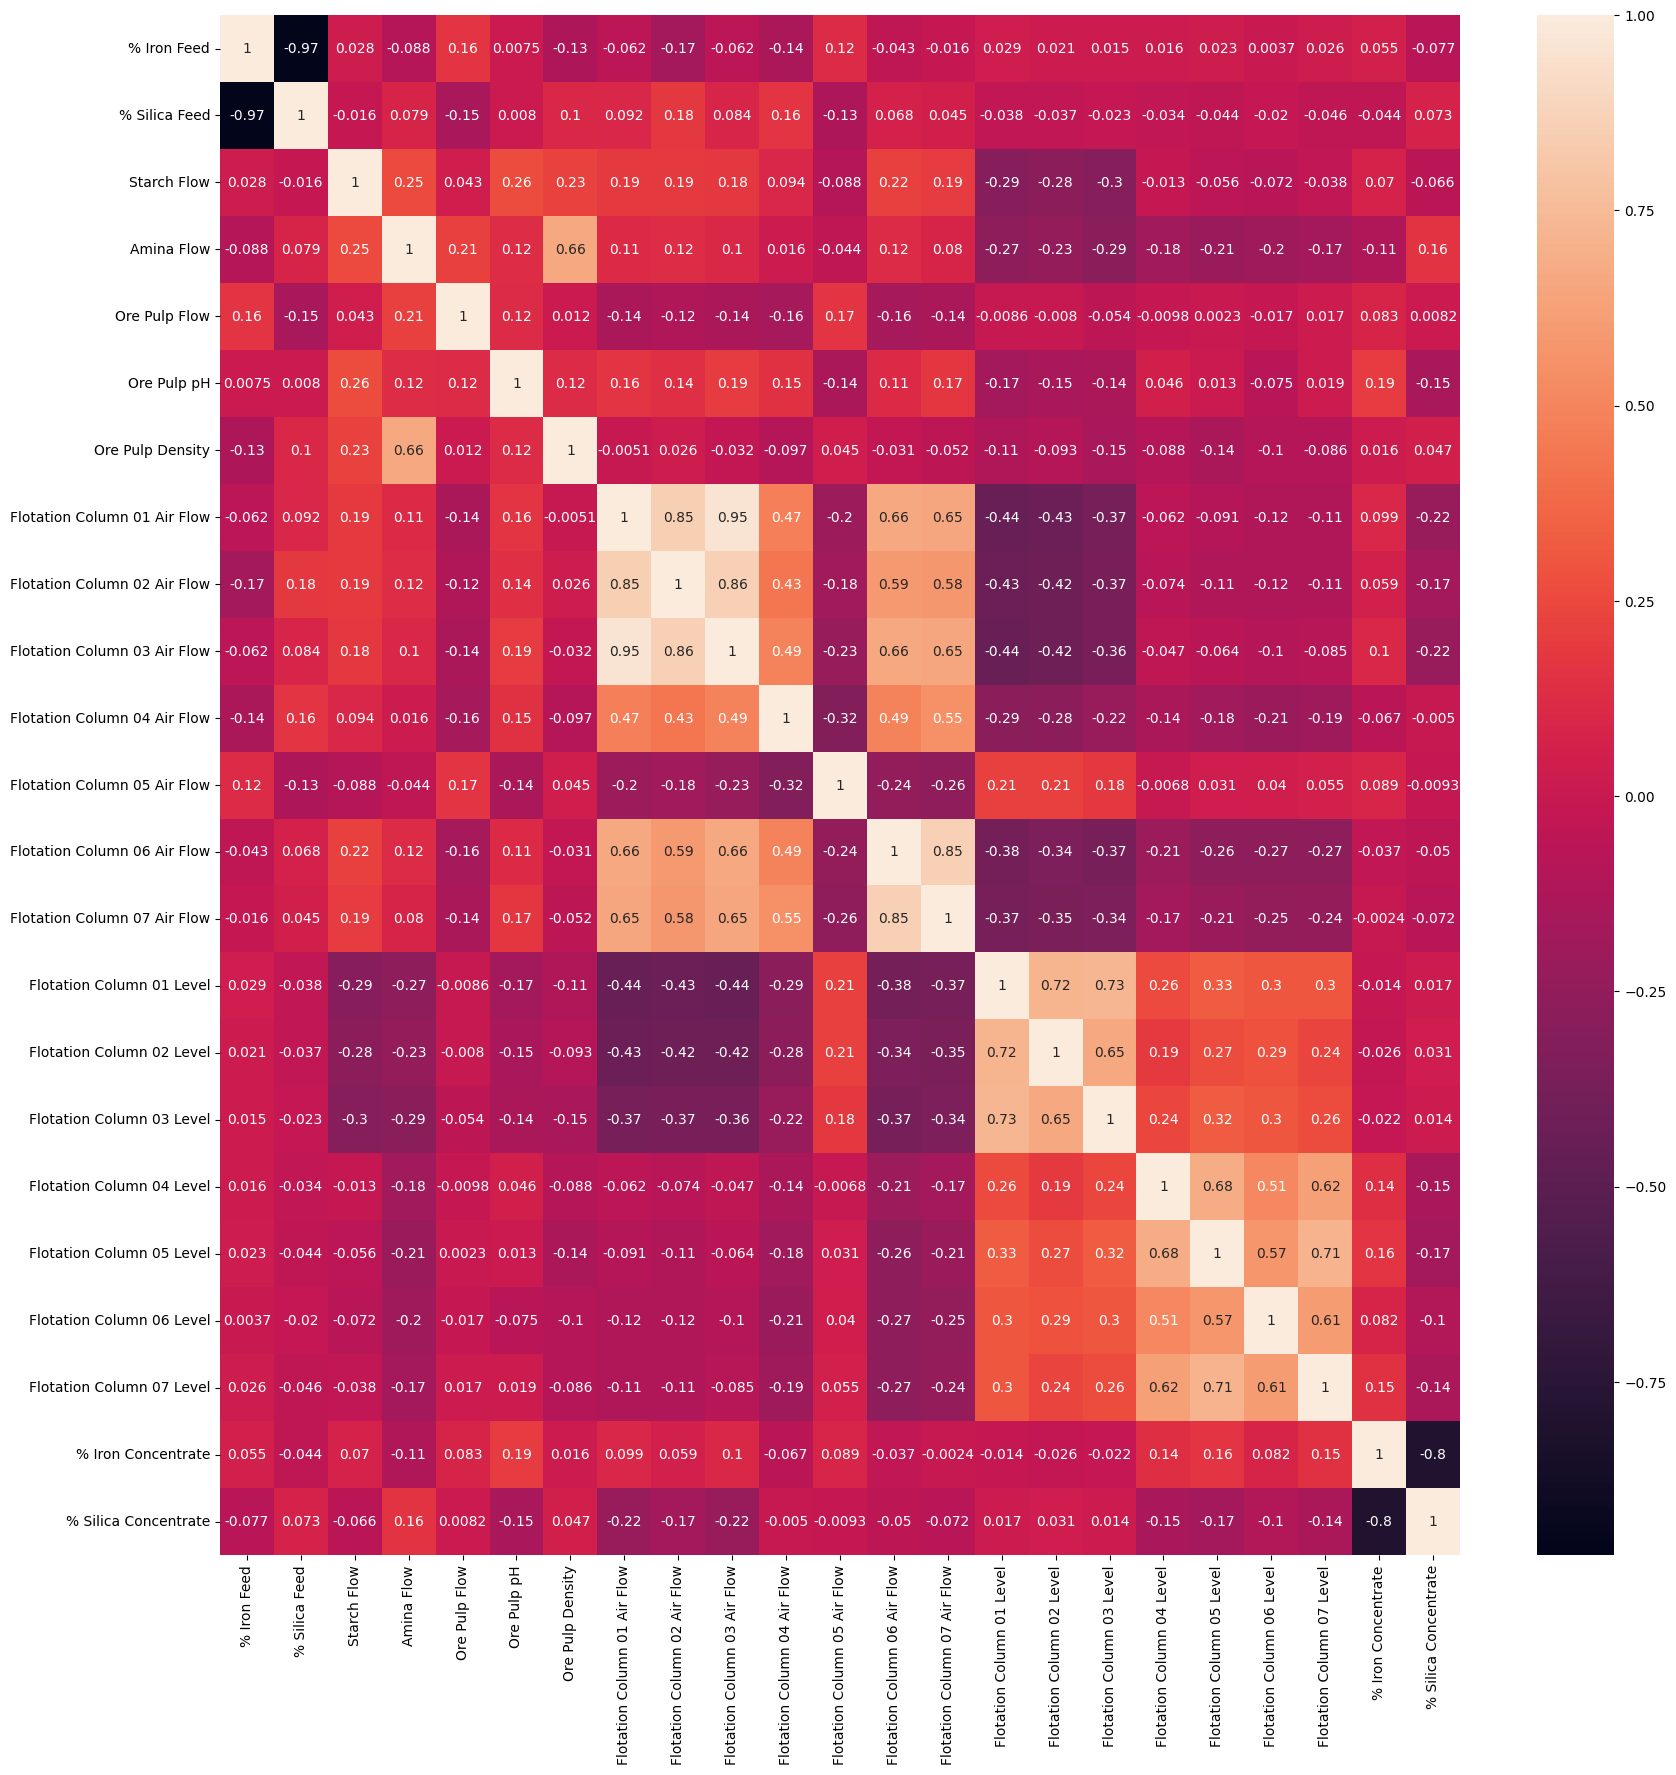

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Posibles columnas:

- iron concentrate
- amina flow
- ore pulp flow
- ore pulp density
- flotation air flow (01|02|03)
- flotation column level (04|05|06|07)
- % silica feed??

In [41]:
# sns.pairplot(df.sample(1000))

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatter_plots_grid(df, target, num_columns=2, color='blue'):
    """
    Genera una cuadrícula de gráficos de dispersión (scatterplots) entre una columna objetivo y todas las demás columnas del DataFrame.
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        El DataFrame que contiene los datos a graficar.
        
    target : str
        El nombre de la columna objetivo que se utilizará en el eje y de los gráficos de dispersión.
        
    num_columns : int, opcional
        El número de columnas que tendrá la cuadrícula de gráficos. Por defecto es 2.
        
    Devuelve:
    ---------
    Muestra una cuadrícula de gráficos de dispersión.
    
    Notas:
    ------
    Si hay menos gráficos que espacios disponibles en la cuadrícula, los gráficos sobrantes serán eliminados para evitar espacios vacíos.
    """
    
    # Crear la lista de columnas excepto el target
    columns = [col for col in df.columns if col != target]
    
    # Calcular el número de gráficos (plots) y el número de filas necesarias
    num_plots = len(columns)
    num_rows = (num_plots + num_columns - 1) // num_columns  # Redondeo hacia arriba para obtener el número de filas

    # Crear la figura y los ejes con un layout de num_columns columnas
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

    # Aplanar los ejes en caso de que haya múltiples filas y columnas
    axes = axes.flatten()

    # Iterar sobre las columnas y crear los scatterplots
    for i, column in enumerate(columns):
        sns.scatterplot(x=df[column], y=df[target], ax=axes[i], color=color)  # Crear el gráfico de dispersión
        axes[i].set_title(f'{target} vs {column}')  # Establecer el título
        axes[i].set_xlabel(column)  # Etiqueta del eje x
        axes[i].set_ylabel(target)  # Etiqueta del eje y

    # Eliminar cualquier gráfico vacío si hay menos gráficos que espacios en la cuadrícula
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el espaciado entre gráficos para evitar solapamiento
    plt.tight_layout()
    
    # Mostrar los gráficos
    plt.show()


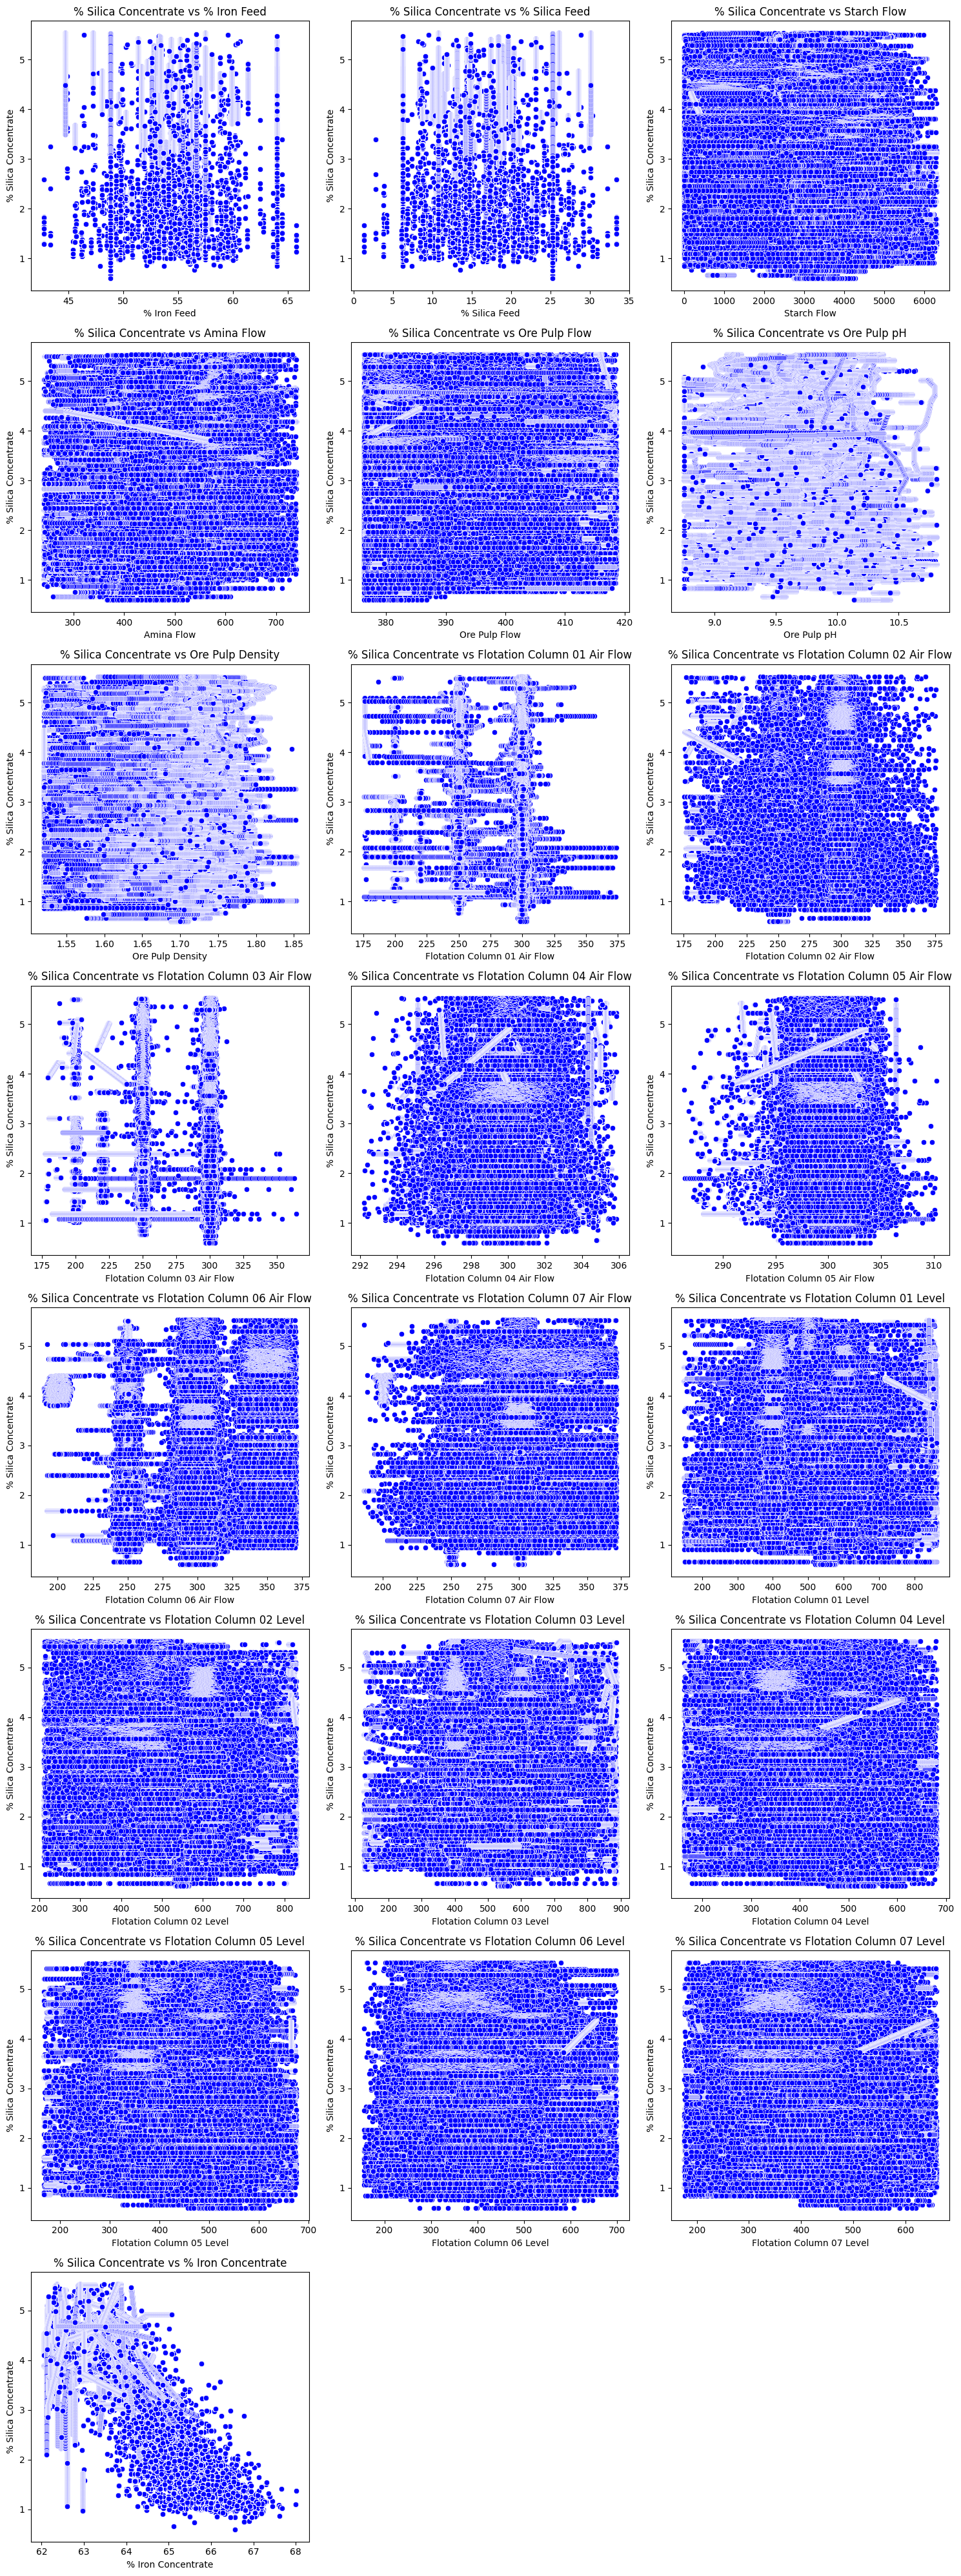

In [43]:
scatter_plots_grid(df, target, num_columns=3)

In [44]:
import pandas as pd

def eliminar_outliers_iqr(df):
    # Crear una copia del DataFrame para no modificar el original
    df_sin_outliers = df.copy()

    # Iterar sobre cada columna del DataFrame
    for col in df_sin_outliers.columns:
        if df_sin_outliers[col].dtype in ['float64', 'int64']:  # Solo aplicar a columnas numéricas
            # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
            Q1 = df_sin_outliers[col].quantile(0.25)
            Q3 = df_sin_outliers[col].quantile(0.75)
            IQR = Q3 - Q1  # Rango Intercuartílico

            # Definir los límites inferior y superior para detectar los outliers
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            # Filtrar los valores que no sean outliers
            df_sin_outliers = df_sin_outliers[(df_sin_outliers[col] >= limite_inferior) & (df_sin_outliers[col] <= limite_superior)]

    return df_sin_outliers



In [45]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [46]:
df_parsed = df[['% Silica Feed', 'Flotation Column 01 Air Flow', 'Amina Flow',
                'Ore Pulp Flow', 'Ore Pulp pH', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
                'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level',
                # '% Iron Concentrate',
                 target]]

df_parsed = eliminar_outliers_iqr(df_parsed)

print('Dimensiones de la data original',df.shape)
print('Dimensiones de la data limpia',df_parsed.shape)
df_parsed.head()

Dimensiones de la data original (737453, 23)
Dimensiones de la data limpia (601666, 12)


% Silica Feed  Flotation Column 01 Air Flow  Amina Flow  Ore Pulp Flow  \
0          16.98                       249.214     557.434        395.713   
1          16.98                       249.719     563.965        397.383   
2          16.98                       249.741     568.054        399.668   
3          16.98                       249.917     568.665        397.939   
4          16.98                       250.203     558.167        400.254   

   Ore Pulp pH  Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  \
0      10.0664                       253.235                       250.576   
1      10.0672                       250.532                       250.862   
2      10.0680                       247.874                       250.313   
3      10.0689                       254.487                       250.049   
4      10.0697                       252.136                       249.895   

   Flotation Column 04 Level  Flotation Column 05 Level  \
0                    443.558                    502.255   
1                    448.086                    496.363   
2                    449.688                    484.411   
3                    446.210                    471.411   
4                    453.670                    462.598   

   Flotation Column 06 Level  Flotation Column 07 Level  % Silica Concentrate  
0                    446.370                    523.344                  1.31  
1                    445.922                    498.075                  1.31  
2                    447.826                    458.567                  1.31  
3                    437.690                    427.669                  1.31  
4                    443.682                    425.679                  1.31

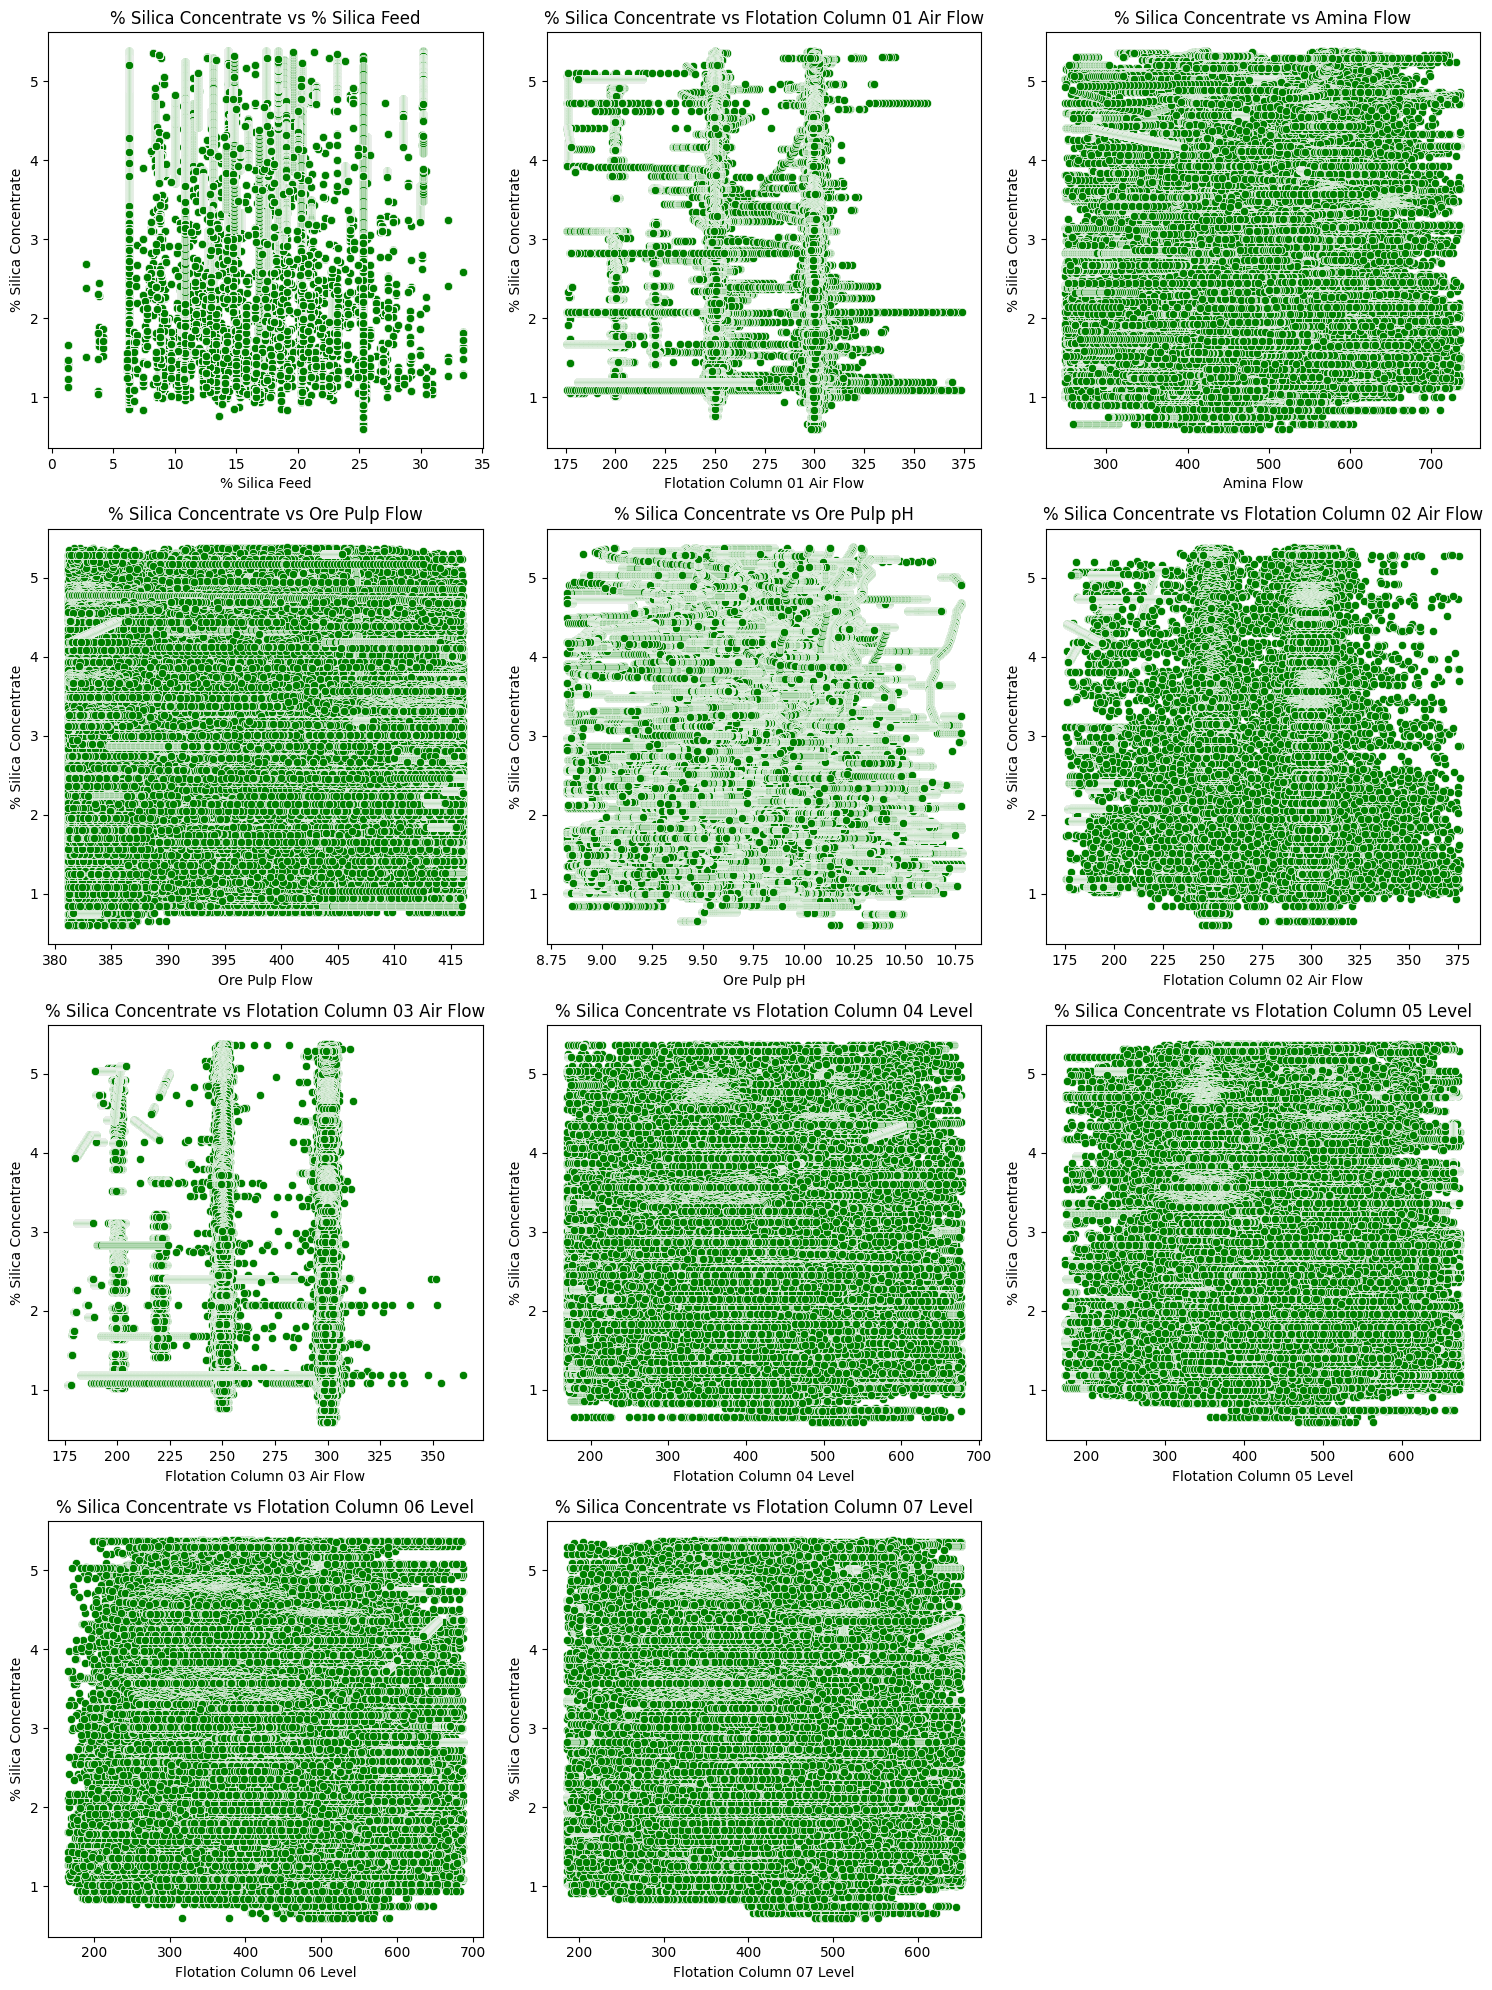

In [47]:
scatter_plots_grid(df_parsed, target, num_columns=3, color='green')

In [48]:
from sklearn.model_selection import train_test_split

X=df_parsed.drop(target ,axis=1)

y=df_parsed[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(601666,)
(481332,)
(120334,)


In [49]:
%pip install xgboost
%pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

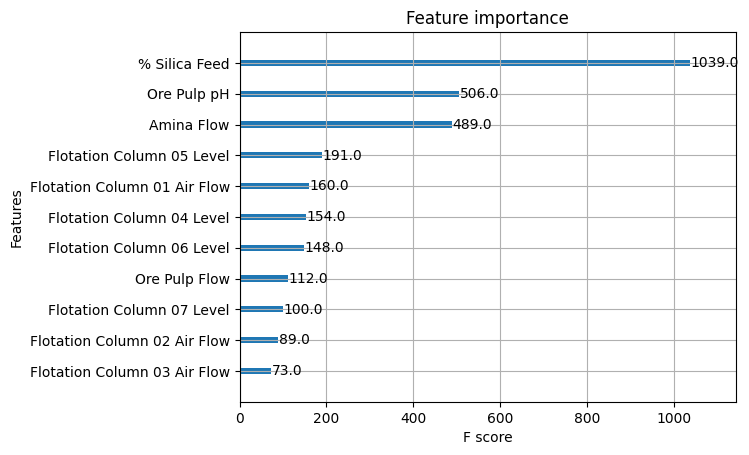

In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd


# Crear un modelo de XGBoost para regresión
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Entrenar el modelo
model.fit(X_train, y_train)

# Mostrar la importancia de las características (opcional)
xgb.plot_importance(model)


El F score en la importancia de las características de XGBoost es una métrica que indica cuántas veces una característica se usa para dividir los datos en los árboles de decisión del modelo. A mayor número de veces que se utiliza una característica para hacer una división, mayor será su importancia.

In [51]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Hacer predicciones con el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular las métricas para el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calcular las métricas para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Crear un DataFrame para mostrar los resultados en formato tabla
metricas = pd.DataFrame({
    'MAE': [mae_train, mae_test],
    'MAPE (%)': [mape_train, mape_test],
    'R²': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test]
}, index=['Train', 'Test'])

metricas


MAE   MAPE (%)        R²      RMSE
Train  0.621086  30.524116  0.452383  0.814269
Test   0.622567  30.533162  0.450117  0.816602

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros encontrados por el GridSearchCV:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error: 0.35394545029157093


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

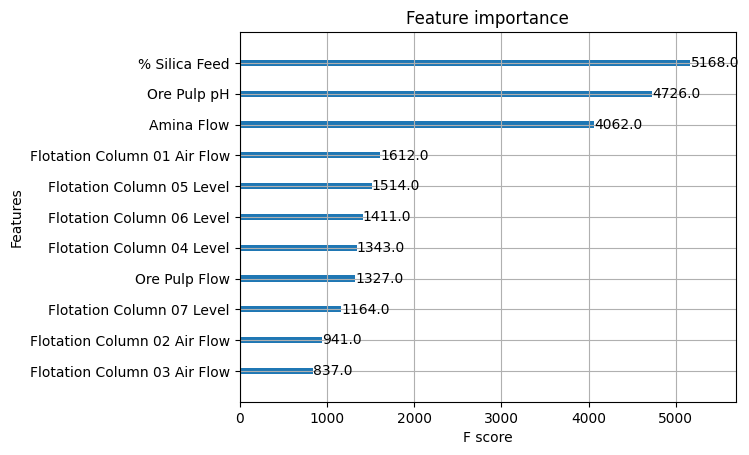

In [52]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Separar los datos en conjunto de entrenamiento y prueba (si aún no lo has hecho)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror')

# Definir los hiperparámetros a probar en el GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar el GridSearchCV con validación cruzada de 5 particiones (5-fold cross-validation)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Entrenar el modelo con el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
print("Mejores hiperparámetros encontrados por el GridSearchCV:")
print(grid_search.best_params_)

# Usar el mejor modelo para hacer predicciones
best_model = grid_search.best_estimator_

# Realizar predicciones sobre el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Mostrar la importancia de las características (opcional)
xgb.plot_importance(best_model)


In [53]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Hacer predicciones con el conjunto de entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calcular las métricas para el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calcular las métricas para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Crear un DataFrame para mostrar los resultados en formato tabla
metricas = pd.DataFrame({
    'MAE': [mae_train, mae_test],
    'MAPE (%)': [mape_train, mape_test],
    'R²': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test]
}, index=['Train', 'Test'])

model = best_model
metricas

MAE   MAPE (%)        R²      RMSE
Train  0.399499  19.494847  0.731027  0.570668
Test   0.416876  20.270030  0.708133  0.594933

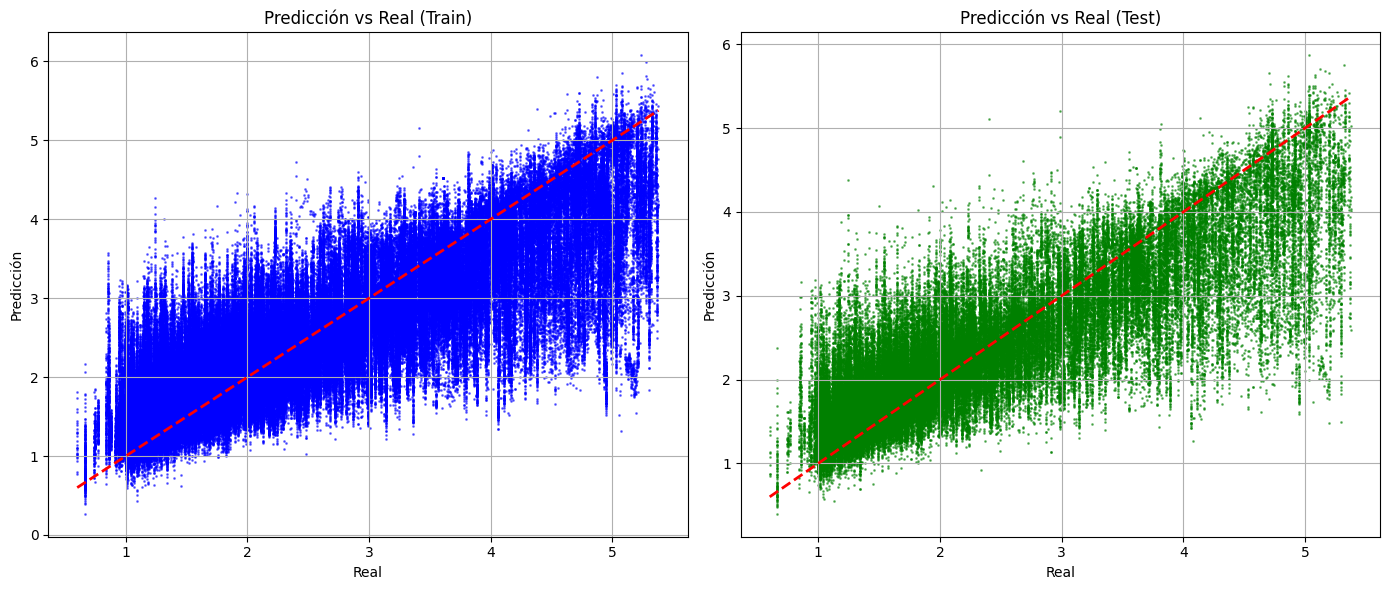

In [54]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Predicción vs Real para el conjunto de entrenamiento
ax[0].scatter(y_train, y_train_pred, color='blue', alpha=0.5, s=1)
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Predicción')
ax[0].set_title('Predicción vs Real (Train)')
ax[0].grid(True)

# Gráfico de Predicción vs Real para el conjunto de prueba
ax[1].scatter(y_test, y_test_pred, color='green', alpha=0.5, s=1)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Predicción')
ax[1].set_title('Predicción vs Real (Test)')
ax[1].grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [55]:
import shap

# Generar los SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualizar los SHAP values para las primeras predicciones
shap.summary_plot(shap_values, X_test)


 57%|===========         | 68207/120334 [06:59<05:20]       

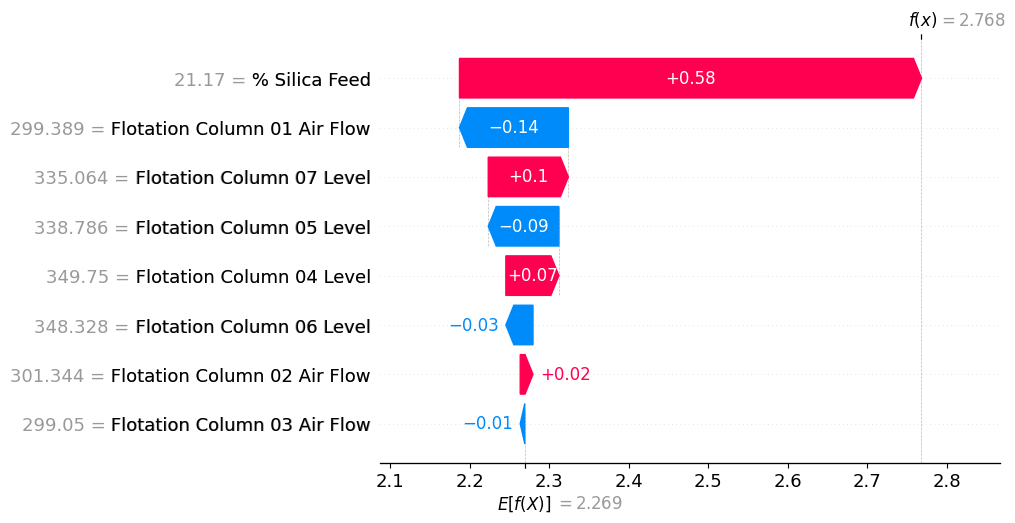

In [19]:
# También puedes visualizar la contribución de una predicción individual
shap.plots.waterfall(shap_values[0])

- Summary plot: Muestra la importancia global de las características para todas las predicciones. Ejemplo: qué factores influyen más en la satisfacción de los clientes en general.
- Waterfall plot: Muestra cómo una característica afecta una predicción individual. Ejemplo: cómo se llegó a predecir que un cliente específico está muy satisfecho.

In [36]:
## guarda el modelo
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))